# [9660] - KMeans
Task: Given this set of customer data, group the customers into customer segments for targeted marketing and product recommendations.  We do NOT have any historical labels for these customers.

Data file:
* https://raw.githubusercontent.com/vjavaly/Baruch-CIS-9660/main/data/mall_customers.csv

In [1]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

Run time: 11/17/24 21:10:51


### Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

### Load data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/vjavaly/Baruch-CIS-9660/main/data/mall_customers.csv')
df.shape

(200, 5)

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income ($),Spending Score (1-100)
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


### Examine data

In [5]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income ($),0
Spending Score (1-100),0


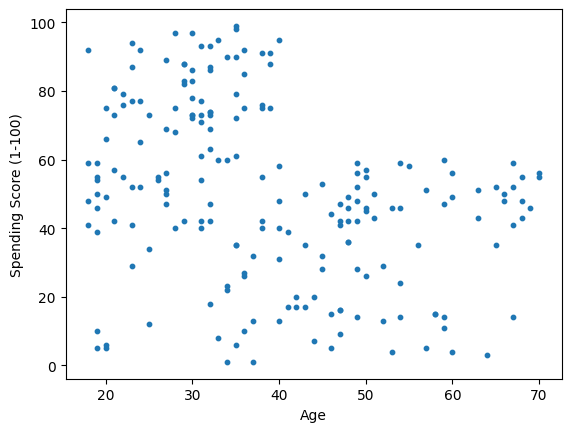

In [6]:
# Compare age to spending score
plt.scatter(df["Age"], df["Spending Score (1-100)"], s=10)
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

The plot above implies two customer segments

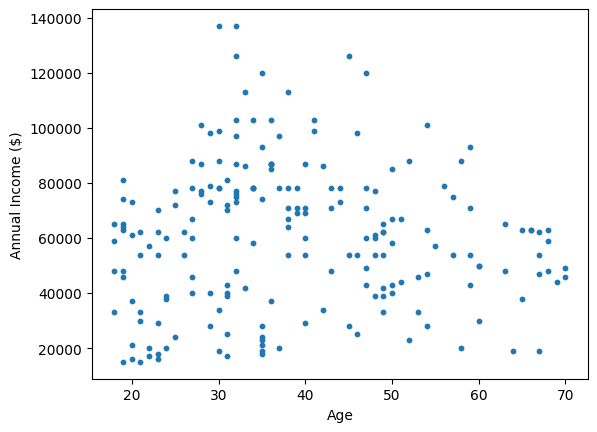

In [7]:
# Compare age to annual income
plt.scatter(df["Age"], df["Annual Income ($)"], s=10)
plt.xlabel("Age")
plt.ylabel("Annual Income ($)")
plt.show()

According to the plot above, there are no obvious customer segments

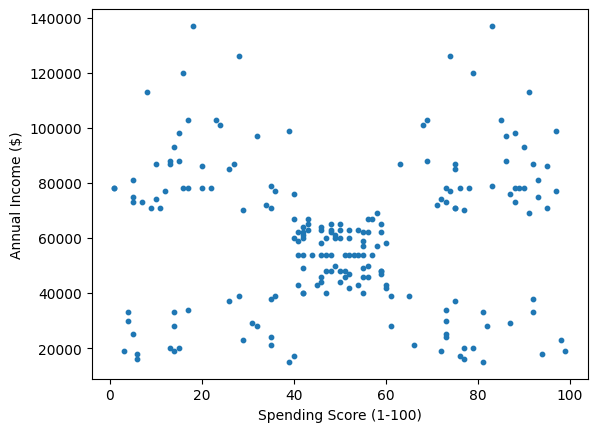

In [8]:
# Compare spending score to annual income
plt.scatter(df["Spending Score (1-100)"], df["Annual Income ($)"], s=10)
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income ($)")
plt.show()

The plot above implies five customer segments

### Prepare data

In [9]:
# Drop unnecessary column: 'CustomerID'
df.drop(['CustomerID'], axis=1, inplace=True)
df.head()

,Genre,Age,Annual Income ($),Spending Score (1-100)
0,Male,19,15000,39
1,Male,21,15000,81
2,Female,20,16000,6
3,Female,23,16000,77
4,Female,31,17000,40


In [10]:
# Encode categorical variable: 'Genre'
df = pd.get_dummies(df, columns=['Genre'], prefix='gender', dtype=int)
df.head()

,Age,Annual Income ($),Spending Score (1-100),gender_Female,gender_Male
0,19,15000,39,0,1
1,21,15000,81,0,1
2,20,16000,6,1,0
3,23,16000,77,1,0
4,31,17000,40,1,0


#### Scale variables

In [11]:
scaler = StandardScaler()
scaler.fit(df)
scaled_df = scaler.transform(df)

### Train KMeans classifier (with default hyperparameters)

In [12]:
# n_clusters default = 8
# n_init = # of times KMeans is run with different centroid seeds
#  Setting n_init to stop warning message
KM = KMeans(n_init='auto', random_state=42)
KM.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 'auto',
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

In [13]:
# Compute k-means clustering
KM.fit(scaled_df)

KMeans(random_state=42)

In [14]:
# Compute cluster centers and predict cluster index for each sample
cluster_labels = KM.fit_predict(scaled_df)

### Review KMeans attributes

In [15]:
# Display cluster centroids
KM.cluster_centers_

array([[ 1.31794399, -0.52575662, -0.44589335, -1.12815215,  1.12815215],
       [-0.45245636,  0.94327069,  1.17982252,  0.88640526, -0.88640526],
       [-0.74015963,  0.04751628,  0.81127593, -1.12815215,  1.12815215],
       [ 0.41265847,  1.21277   , -1.11029664,  0.88640526, -0.88640526],
       [-0.74039302, -0.39925223, -0.31316059,  0.88640526, -0.88640526],
       [-0.02700694,  0.96701244, -1.39716754, -1.12815215,  1.12815215],
       [ 1.01325595, -0.47702244, -0.2952865 ,  0.88640526, -0.88640526],
       [-0.96084556, -1.33087991,  1.17778643,  0.88640526, -0.88640526]])

In [16]:
# Display cluster labels for each data instance
KM.labels_

array([2, 2, 4, 7, 4, 7, 4, 7, 0, 7, 0, 7, 6, 7, 0, 2, 4, 2, 0, 7, 0, 2,
       6, 2, 6, 2, 6, 2, 4, 7, 0, 7, 0, 2, 6, 7, 6, 7, 4, 7, 6, 2, 0, 4,
       6, 7, 6, 4, 4, 4, 6, 2, 4, 0, 6, 0, 6, 0, 4, 0, 0, 2, 6, 6, 0, 2,
       6, 6, 2, 4, 0, 6, 6, 6, 0, 2, 6, 2, 4, 6, 0, 2, 0, 6, 4, 0, 6, 4,
       4, 6, 6, 2, 0, 4, 4, 2, 6, 4, 0, 2, 4, 6, 0, 2, 0, 4, 6, 0, 0, 0,
       0, 4, 4, 2, 4, 4, 6, 6, 6, 6, 2, 4, 1, 2, 4, 1, 5, 2, 0, 2, 5, 2,
       4, 1, 5, 1, 3, 2, 5, 1, 3, 2, 4, 1, 5, 2, 5, 1, 3, 2, 5, 2, 3, 1,
       3, 1, 5, 1, 5, 1, 3, 1, 5, 1, 5, 1, 5, 1, 3, 2, 5, 2, 5, 2, 3, 1,
       5, 2, 5, 2, 3, 1, 5, 1, 3, 2, 3, 2, 3, 1, 3, 1, 5, 1, 3, 1, 3, 2,
       5, 2], dtype=int32)

In [17]:
# Display # iterations
KM.n_iter_

8

### Evaluate KMeans model

In [18]:
# Display model inertia_
KM.inertia_

215.68191362806564

In [19]:
# Calculate silhouette coefficient
metrics.silhouette_score(scaled_df, cluster_labels)

0.39845990428423406

In [20]:
# Calculate Calinski Harabasz score
metrics.calinski_harabasz_score(scaled_df, cluster_labels)

99.74283097223831

### Re-train KMeans classifier (with different n_clusters)

In [21]:
# Try with n_clusters=5
KM = KMeans(n_init='auto', n_clusters=5, random_state=42)
KM.fit(scaled_df)

KMeans(n_clusters=5, random_state=42)

In [22]:
cluster_labels = KM.fit_predict(scaled_df)

### Evaluate re-trained KMeans model

In [23]:
# Display model inertia_
KM.inertia_

342.1559273478464

In [24]:
# Calculate silhouette coefficient
metrics.silhouette_score(scaled_df, cluster_labels)

0.3393828419073789

In [25]:
# Calculate Calinski Harabasz score
metrics.calinski_harabasz_score(scaled_df, cluster_labels)

93.72889954114174

inertia increased (not good), silhouette_score is closer to 0 (good) and calinski_harabasz_score decreased (not good)

How to find best combination for these metrics?

### Determine the optimal K value (using inertia_)

In [26]:
# Find the optimal K value
k_values = range(2, 10)
inertias = []

for k in k_values:
    KM = KMeans(n_clusters=k, n_init='auto', random_state=42)
    KM.fit(scaled_df)
    inertias.append(KM.inertia_)

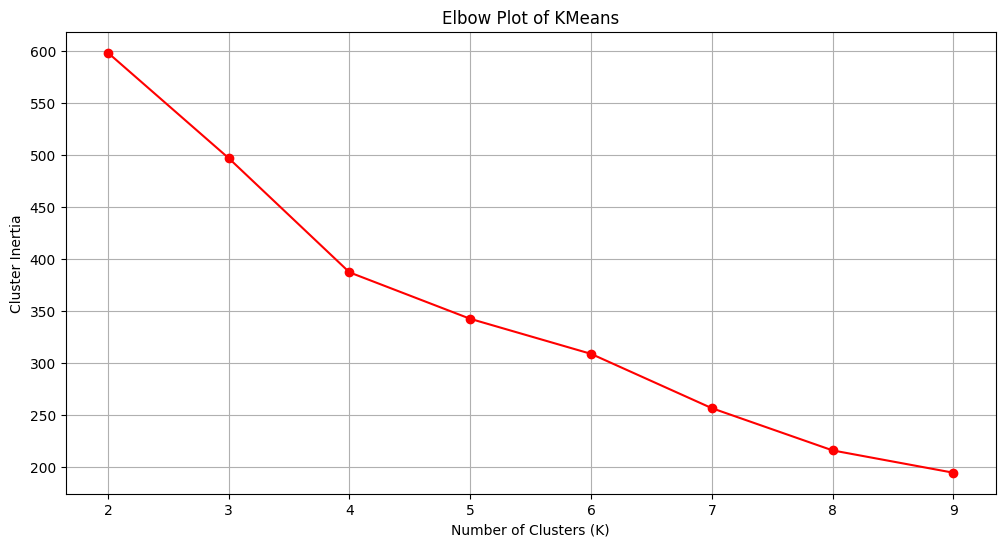

In [27]:
# Generate elbow plot
figure = plt.subplots(figsize = (12, 6))
plt.plot(k_values, inertias, 'o-', color='red')
plt.grid(True)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Cluster Inertia")
plt.title("Elbow Plot of KMeans")
plt.show()

From the plot above, it seems that 4 is the optimal K value

 ### Determine the optimal K value (using silhouette score)

In [28]:
# Find the optimal K value
k_values = range(2, 10)
silhouette_scores = []

for k in k_values:
    KM = KMeans(n_clusters=k, n_init='auto', random_state=42)
    cluster_labels = KM.fit_predict(scaled_df)
    silhouette_avg = metrics.silhouette_score(scaled_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

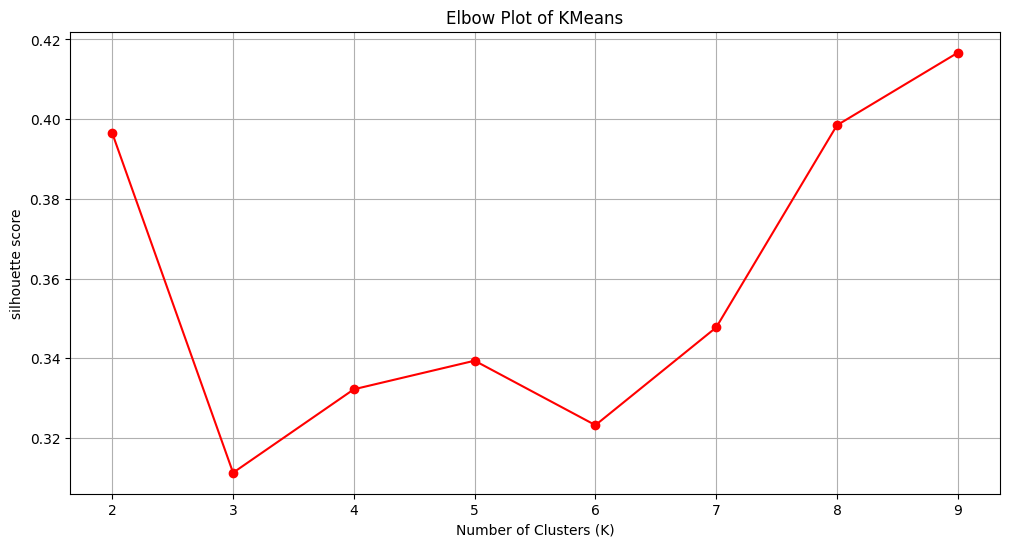

In [29]:
# Generate elbow plot
figure = plt.subplots(figsize = (12, 6))
plt.plot(k_values, silhouette_scores, 'o-', color='red')
plt.grid(True)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("silhouette score")
plt.title("Elbow Plot of KMeans")
plt.show()

From the plot above, it seems that 3 is the optimal K value

### Determine the optimal K value (using Calinski Harabasz score)

In [30]:
# Find the optimal K value
k_values = range(2, 10)
CH_scores = []

for k in k_values:
    KM = KMeans(n_clusters=k, n_init='auto', random_state=42)
    cluster_labels = KM.fit_predict(scaled_df)
    CH_avg = metrics.calinski_harabasz_score(scaled_df, cluster_labels)
    CH_scores.append(CH_avg)

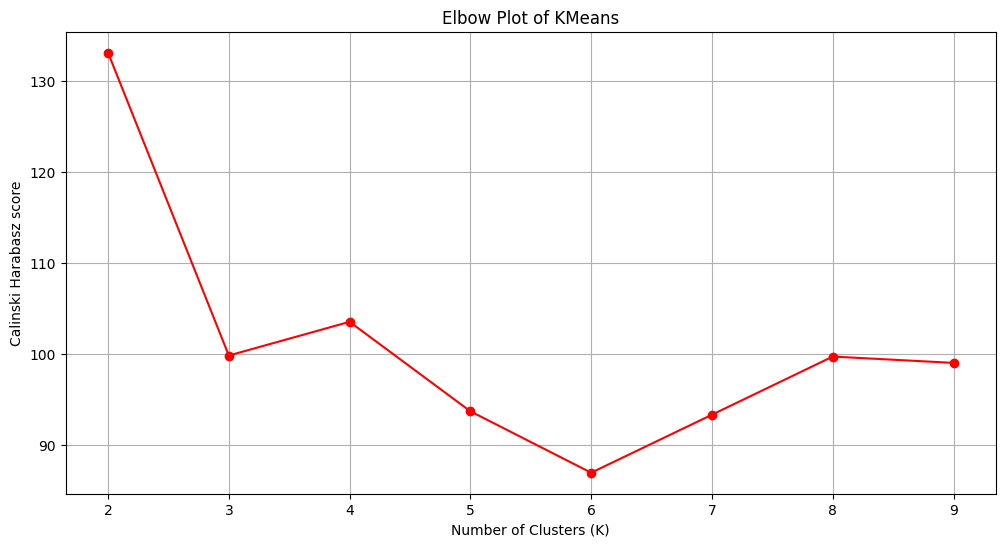

In [31]:
# Generate elbow plot
figure = plt.subplots(figsize = (12, 6))
plt.plot(k_values, CH_scores, 'o-', color='red')
plt.grid(True)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Calinski Harabasz score")
plt.title("Elbow Plot of KMeans")
plt.show()

From the plot above, it seems that 3 is the optimal K value

### Re-train KMeans classifier with optimal K value

In [32]:
KM = KMeans(n_clusters=4, n_init='auto', random_state=42)
KM.fit(scaled_df)

KMeans(n_clusters=4, random_state=42)

In [33]:
cluster_labels = KM.fit_predict(scaled_df)

### Evaluate optimal KMeans model

In [34]:
# Display model inertia_ after retraining
KM.inertia_

386.8284255837665

In [35]:
# Calculate silhouette coefficient
metrics.silhouette_score(scaled_df, cluster_labels)

0.33220710753566407

In [36]:
# Calculate Calinski Harabasz score
metrics.calinski_harabasz_score(scaled_df, cluster_labels)

103.56152808937144